--- HOUSE PRICE PREDICTION MODEL SUMMARY ---
Linear Regression MAE: $2,188,736.34
Linear Regression R2 Score: 0.9406
Random Forest MAE: $1,493,949.17
Random Forest R2 Score: 0.9711

Most Important Feature: Area


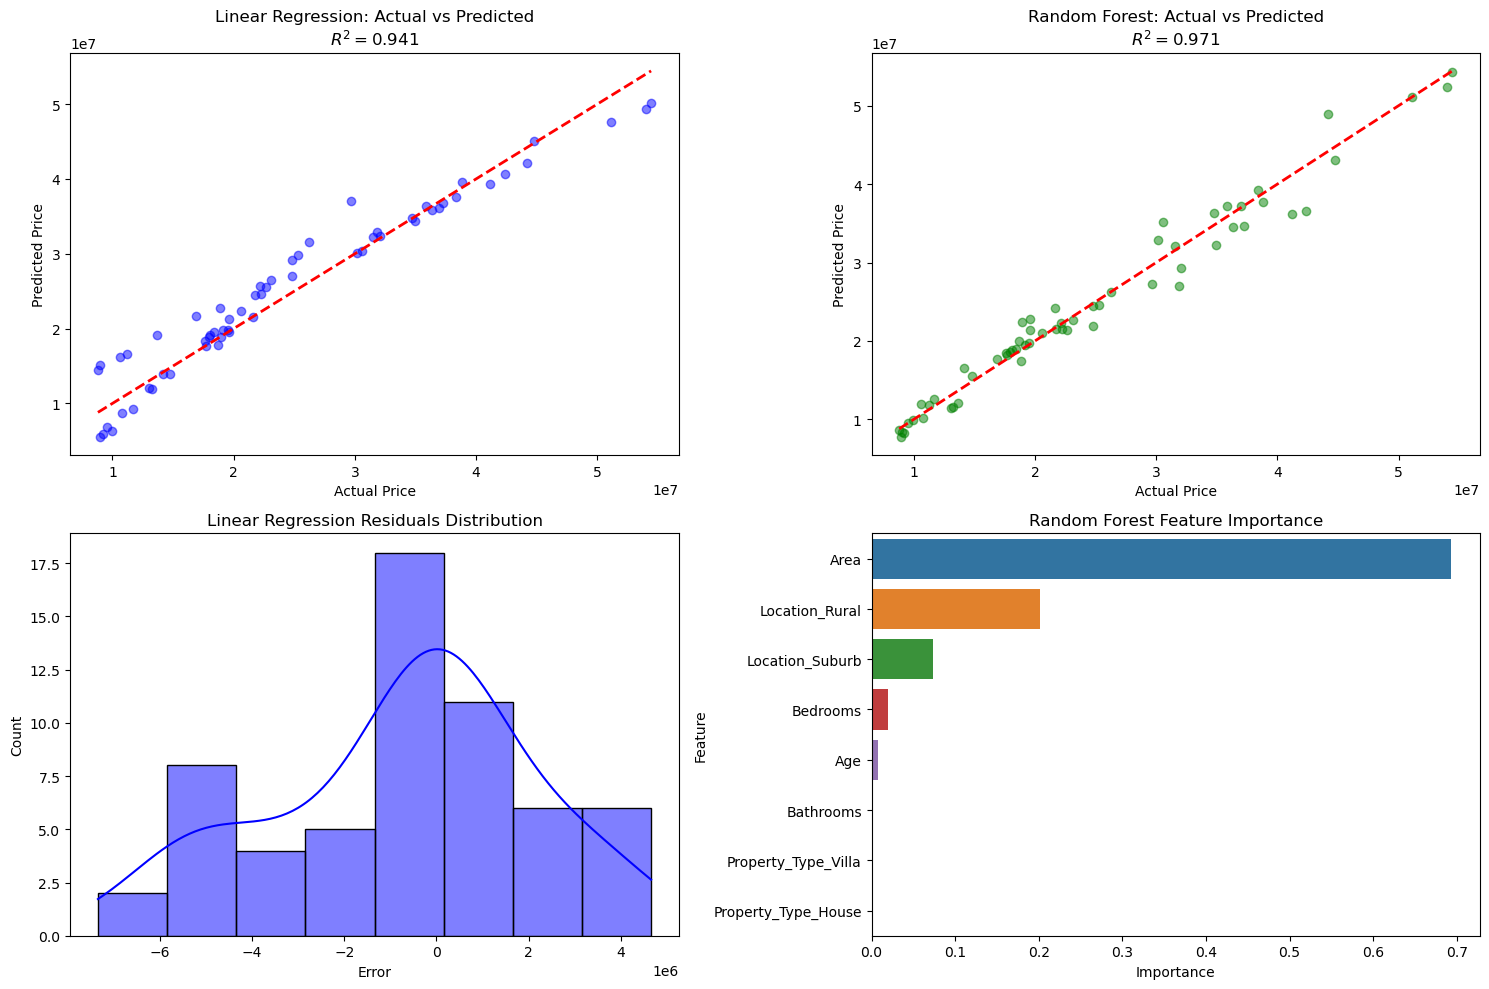

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Or, address the specific pandas suggestion mentioned in the error
pd.set_option('mode.use_inf_as_na', False) 

# Load the dataset
df = pd.read_csv('house_prices.csv')

# --- Day 1: Understand the Data ---
# Check missing values
missing_values = df.isnull().sum().sum()

# --- Day 2: Data Preparation ---
# Drop Property_ID
data = df.drop(columns=['Property_ID'])
# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Location', 'Property_Type'], drop_first=True)

# Define X and y
X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Day 4 & 5: Train & Evaluate Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

# --- Day 6: Improve Model (Random Forest) ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

# --- Day 7: Interpret ---
# Feature Importance from Random Forest
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted (Linear Regression)
plt.subplot(2, 2, 1)
plt.scatter(y_test, lr_preds, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Linear Regression: Actual vs Predicted\n$R^2 = {lr_r2:.3f}$')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# 2. Actual vs Predicted (Random Forest)
plt.subplot(2, 2, 2)
plt.scatter(y_test, rf_preds, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Random Forest: Actual vs Predicted\n$R^2 = {rf_r2:.3f}$')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# 3. Residuals (Linear Regression)
plt.subplot(2, 2, 3)
sns.histplot(y_test - lr_preds, kde=True, color='blue')
plt.title('Linear Regression Residuals Distribution')
plt.xlabel('Error')

# 4. Feature Importance
plt.subplot(2, 2, 4)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')

plt.tight_layout()
plt.savefig('project_summary_plots.png')

# Print Final Summary
print("--- HOUSE PRICE PREDICTION MODEL SUMMARY ---")
print(f"Linear Regression MAE: ${lr_mae:,.2f}")
print(f"Linear Regression R2 Score: {lr_r2:.4f}")
print(f"Random Forest MAE: ${rf_mae:,.2f}")
print(f"Random Forest R2 Score: {rf_r2:.4f}")
print("\nMost Important Feature:", feature_importance.iloc[0]['Feature'])

In [2]:
from sklearn.ensemble import RandomForestRegressor

# Improve the model (Day 6)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Final Metrics
print(f"Random Forest MAE: ${mean_absolute_error(y_test, predictions):,.2f}")
print(f"Random Forest R2 Score: {r2_score(y_test, predictions):.4f}")

Random Forest MAE: $1,493,949.17
Random Forest R2 Score: 0.9711
